<a href="https://colab.research.google.com/github/rapidwindow/Light-economic/blob/main/Normal%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

In [ ]:
# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNISTデータを加工する
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
# リストの後ろからN個の要素を削除
x_train = x_train[:-58000]
y_train = y_train[:-58000]
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = keras.utils.to_categorical(y_train, 10)
y_test   = keras.utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Dense(64, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# 学習
epochs = 20
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 503ms/step - accuracy: 0.3275 - loss: 1.9943 - val_accuracy: 0.7810 - val_loss: 0.7340
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 525ms/step - accuracy: 0.7722 - loss: 0.7221 - val_accuracy: 0.8243 - val_loss: 0.5619
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 546ms/step - accuracy: 0.8405 - loss: 0.4712 - val_accuracy: 0.8986 - val_loss: 0.3482
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 579ms/step - accuracy: 0.8863 - loss: 0.3606 - val_accuracy: 0.9105 - val_loss: 0.3011
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 493ms/step - accuracy: 0.9134 - loss: 0.2750 - val_accuracy: 0.9099 - val_loss: 0.2815
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 491ms/step - accuracy: 0.9117 - loss: 0.2759 - val_accuracy: 0.9363 - val_loss: 0.2133
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 544ms/step - accuracy: 0.9244 - loss: 0.2417 - val_accuracy: 0.9290 - val_loss: 0.2331
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 595ms/step - accuracy: 0.9431 - loss: 0.1795 - val_accu

In [ ]:
# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9533 - loss: 0.1640

Test loss: 0.1403728723526001
Test accuracy: 0.9589999914169312


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


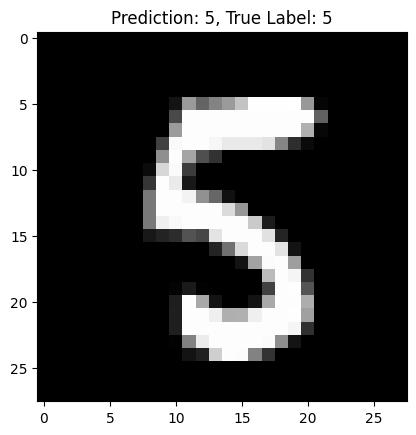

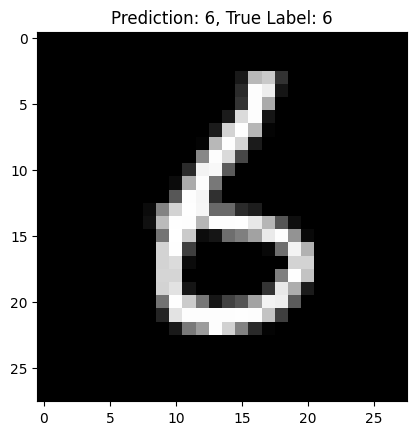

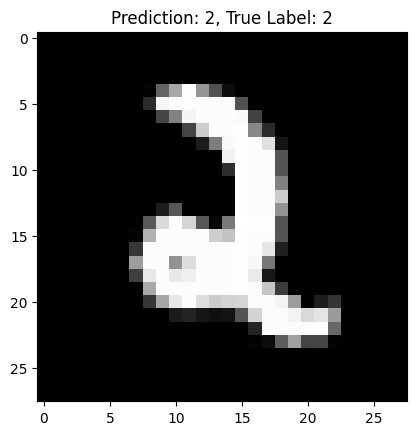

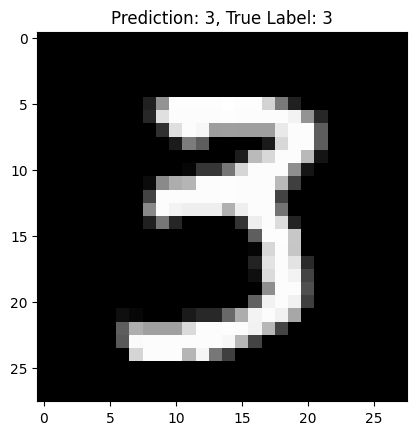

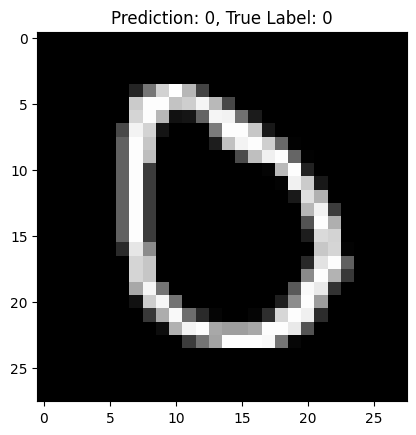

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# x_test: テストデータ
# y_test: 正解ラベル
# model: 評価対象のモデル

# テストデータに対する予測を取得
predictions = model.predict(x_test)

# いくつかの画像をランダムに選択
num_images_to_show = 5
random_indices = np.random.choice(len(x_test), size=num_images_to_show, replace=False)

# 画像と予測結果を表示
for i in random_indices:
    # 画像の表示
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Prediction: {np.argmax(predictions[i])}, True Label: {np.argmax(y_test[i])}')
    plt.show()